# Finacial Analysis 
## Project Group-5

# Walmart Stock Analysis

# Monte Carlo Simulation

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from pandas_datareader import data as pdr
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
from prophet import Prophet

In [2]:
ticker = 'WMT'
df_yf = pdr.get_data_yahoo(ticker, start='2019-04-08')
df_yf

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-08   98.449997   99.250000   98.260002   99.230003   92.826881   
2019-04-09   98.800003   99.230003   98.150002   98.690002   92.321724   
2019-04-10   98.510002   99.720001   98.500000   99.599998   93.173004   
2019-04-11   99.699997  100.830002   99.470001  100.800003   94.295578   
2019-04-12  101.000000  102.019997  101.000000  101.559998   95.006523   
...                ...         ...         ...         ...         ...   
2023-04-12  149.789993  150.970001  149.169998  149.339996  149.339996   
2023-04-13  149.649994  150.000000  148.199997  149.490005  149.490005   
2023-04-14  149.029999  149.889999  148.149994  148.479996  148.479996   
2023-04-17  148.639999  149.669998  148.500000  149.520004  149.520004   
2023-04-18  149.779999  150.339905  149.479996  150.000000  150.000000   

             Volume  
Date                 
2019-04-08  5422400  
2019-04-09  4367500  
2019-04-10  4091100  
2019-04-11  5606900  
2019-04-12  5162000  
...             ...  
2023-04-12  3736600  
2023-04-13  4424200  
2023-04-14  3488300  
2023-04-17  5388300  
2023-04-18  1893669  

[1015 rows x 6 columns]

In [3]:
data = df_yf[['Adj Close']]
data

Adj Close
Date                  
2019-04-08   92.826881
2019-04-09   92.321724
2019-04-10   93.173004
2019-04-11   94.295578
2019-04-12   95.006523
...                ...
2023-04-12  149.339996
2023-04-13  149.490005
2023-04-14  148.479996
2023-04-17  149.520004
2023-04-18  150.000000

[1015 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

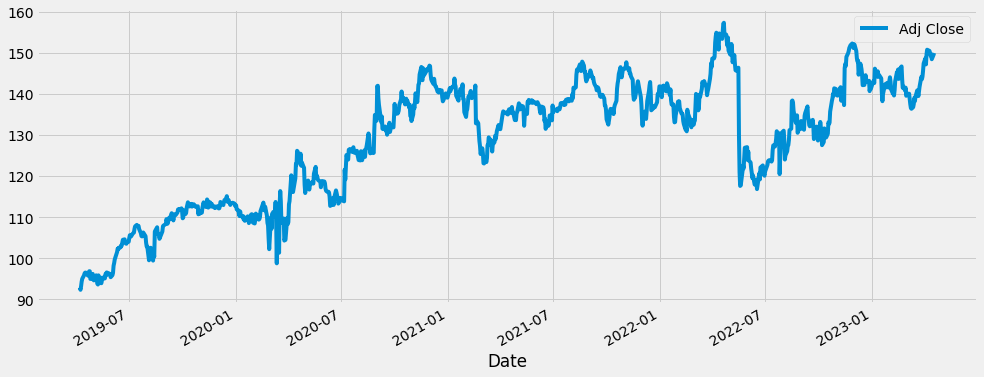

In [4]:
data.plot(figsize=(15,6))

In [5]:
stock_returns = np.log(1 + data.pct_change())
#stock_returns.tail()

Text(0, 0.5, 'Frequency')

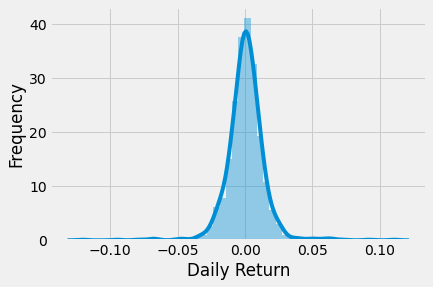

In [6]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

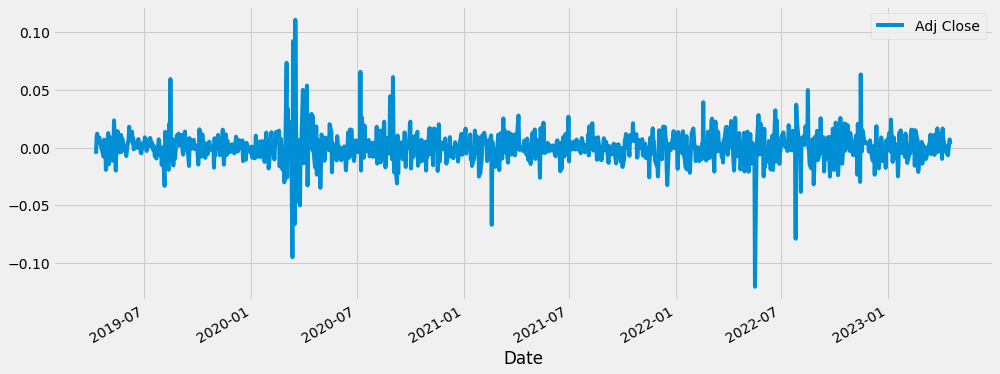

In [7]:
stock_returns.plot(figsize=(15,6))

In [8]:
u = stock_returns.mean()
var = stock_returns.var()

In [9]:
drift = u - (0.5*var)
drift

Adj Close    0.000364
dtype: float64

In [10]:
stddev = stock_returns.std() 
stddev

Adj Close    0.014754
dtype: float64

In [11]:
type(drift)
type(stddev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00036444])

In [13]:
drift.values

array([0.00036444])

In [14]:
stddev.values

array([0.01475379])

In [15]:
x = np.random.rand(10,2)
norm.ppf(x)

array([[-3.07953567e-01,  3.91070952e-01],
       [-8.64482877e-01,  6.89535922e-01],
       [-1.37403760e+00, -5.81553561e-01],
       [-7.93976652e-01, -1.18273615e+00],
       [ 7.79589160e-01, -7.73945042e-01],
       [-1.37355607e+00, -1.41222080e+00],
       [-1.78060292e-03, -9.92511026e-01],
       [-7.80423415e-02, -2.04083157e+00],
       [-8.46947707e-01,  1.43908617e+00],
       [-4.93856927e-01,  7.85818309e-01]])

In [16]:
stdev = stock_returns.std()
days = 30
iterations = 100
Z = norm.ppf(np.random.rand(days, iterations))

In [17]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [18]:
S0 = data.iloc[-1]
S0

Adj Close    150.0
Name: 2023-04-18 00:00:00, dtype: float64

In [19]:
price_paths = np.zeros_like(get_daily_returns)

In [20]:
price_paths.shape

(30, 100)

In [21]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
price_paths[0] = S0

In [23]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

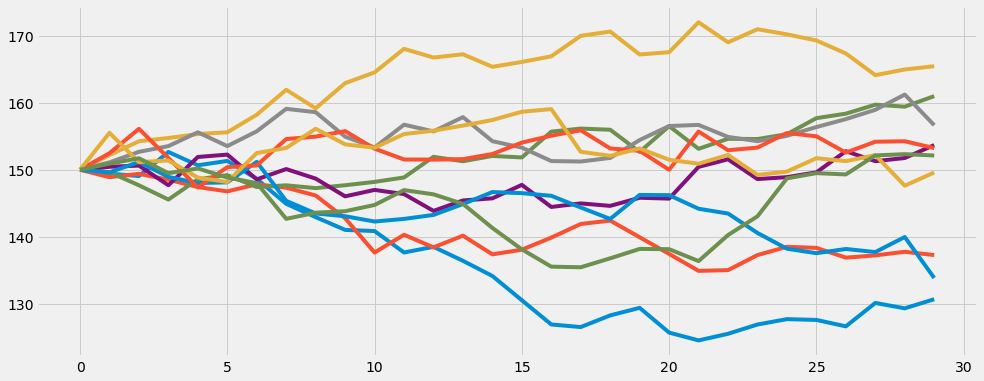

In [24]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])

Text(0, 0.5, 'Frequency')

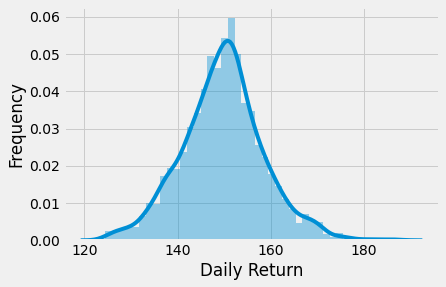

In [25]:
sns.distplot(pd.DataFrame(price_paths).iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [26]:

df1=pd.DataFrame(price_paths)
df1.head()

0           1           2           3           4           5   \
0  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
1  149.415904  148.890472  152.186041  149.629655  151.108540  150.443880   
2  149.061742  149.390725  154.254449  147.681480  152.672568  150.620959   
3  152.654200  148.522122  154.739331  145.551231  153.530746  147.689305   
4  150.673051  147.414446  155.336912  148.583085  155.590800  151.909150   

           6           7           8           9   ...          90  \
0  150.000000  150.000000  150.000000  150.000000  ...  150.000000   
1  149.611875  152.468219  155.516254  150.909860  ...  151.218969   
2  151.166304  156.108501  151.135943  151.712415  ...  154.645980   
3  148.934013  151.758737  151.387692  149.494309  ...  154.331384   
4  148.014554  147.351827  148.833624  150.193807  ...  152.755002   

           91          92          93          94          95          96  \
0  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
1  149.291440  148.982807  150.747432  150.278501  148.413773  152.404638   
2  151.241469  151.624388  155.978570  150.069438  150.317621  153.883287   
3  150.556468  148.795087  155.767757  150.119919  152.618470  154.836297   
4  148.597186  148.726952  156.016104  147.602562  152.703343  158.050431   

           97          98          99  
0  150.000000  150.000000  150.000000  
1  152.723109  152.208931  147.737317  
2  150.850149  146.987239  148.345770  
3  149.720135  147.632612  147.702572  
4  149.791118  150.309528  145.461576  

[5 rows x 100 columns]

In [27]:
df1.head()

0           1           2           3           4           5   \
0  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
1  149.415904  148.890472  152.186041  149.629655  151.108540  150.443880   
2  149.061742  149.390725  154.254449  147.681480  152.672568  150.620959   
3  152.654200  148.522122  154.739331  145.551231  153.530746  147.689305   
4  150.673051  147.414446  155.336912  148.583085  155.590800  151.909150   

           6           7           8           9   ...          90  \
0  150.000000  150.000000  150.000000  150.000000  ...  150.000000   
1  149.611875  152.468219  155.516254  150.909860  ...  151.218969   
2  151.166304  156.108501  151.135943  151.712415  ...  154.645980   
3  148.934013  151.758737  151.387692  149.494309  ...  154.331384   
4  148.014554  147.351827  148.833624  150.193807  ...  152.755002   

           91          92          93          94          95          96  \
0  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
1  149.291440  148.982807  150.747432  150.278501  148.413773  152.404638   
2  151.241469  151.624388  155.978570  150.069438  150.317621  153.883287   
3  150.556468  148.795087  155.767757  150.119919  152.618470  154.836297   
4  148.597186  148.726952  156.016104  147.602562  152.703343  158.050431   

           97          98          99  
0  150.000000  150.000000  150.000000  
1  152.723109  152.208931  147.737317  
2  150.850149  146.987239  148.345770  
3  149.720135  147.632612  147.702572  
4  149.791118  150.309528  145.461576  

[5 rows x 100 columns]

In [28]:
u1 = df1.mean()

In [29]:
var1 =df1.var()

In [30]:
u

Adj Close    0.000473
dtype: float64

In [31]:
stock_returns1 = np.log(1 + df1.pct_change())
stock_returns1.tail()

0         1         2         3         4         5         6   \
25 -0.000929 -0.001207 -0.005400  0.015263  0.008389  0.004786 -0.004877   
26 -0.007526 -0.010581 -0.011504  0.004247  0.007555  0.020878  0.004581   
27  0.027198  0.002432 -0.019543  0.008435  0.008749 -0.009794 -0.003334   
28 -0.006189  0.003923  0.005146 -0.001865  0.014230  0.003136  0.016167   
29  0.010452 -0.003536  0.002948  0.009814 -0.028764  0.012624 -0.044666   

          7         8         9   ...        90        91        92        93  \
25 -0.003172  0.013229  0.005243  ...  0.010940 -0.018922 -0.007057  0.004362   
26 -0.015826 -0.002883 -0.001303  ...  0.001497 -0.009618 -0.029465  0.014892   
27  0.010573  0.005922  0.018829  ...  0.014667  0.000754 -0.013865  0.003671   
28  0.000480 -0.030433  0.001233  ...  0.018108 -0.009652 -0.000167 -0.001819   
29 -0.006646  0.013230 -0.001314  ...  0.014240 -0.020362  0.020893 -0.007973   

          94        95        96        97        98        99  
25  0.012443 -0.003161  0.006401  0.014851 -0.027223 -0.002771  
26  0.006402 -0.000832  0.014121 -0.005944  0.004289 -0.009112  
27  0.013975  0.022944 -0.007704  0.014157  0.009474 -0.012985  
28  0.003303 -0.000965  0.012348  0.030190  0.018244 -0.002983  
29  0.008073  0.008687 -0.013181 -0.007416  0.001508  0.004253  

[5 rows x 100 columns]

In [32]:
u1 = stock_returns1 .mean()
var =df1.var()
u1

0    -0.004756
1    -0.003058
2     0.003382
3     0.002438
4     0.001496
        ...   
95    0.007638
96   -0.001485
97    0.001501
98    0.002744
99   -0.002765
Length: 100, dtype: float64

# Time Series Analysis

## SMA

In [33]:
ticker ='WMT'
df=pdr.get_data_yahoo(ticker, start='2019-04-08')
df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-12  149.789993  150.970001  149.169998  149.339996  149.339996   
2023-04-13  149.649994  150.000000  148.199997  149.490005  149.490005   
2023-04-14  149.029999  149.889999  148.149994  148.479996  148.479996   
2023-04-17  148.639999  149.669998  148.500000  149.520004  149.520004   
2023-04-18  149.779999  150.339905  149.479996  150.006104  150.006104   

             Volume  
Date                 
2023-04-12  3736600  
2023-04-13  4424200  
2023-04-14  3488300  
2023-04-17  5388300  
2023-04-18  1893842

In [34]:
df.index = pd.to_datetime(df.index)

In [35]:
df.index = df.index.date

print(df.head())

                  Open        High         Low       Close  Adj Close   Volume
2019-04-08   98.449997   99.250000   98.260002   99.230003  92.826897  5422400
2019-04-09   98.800003   99.230003   98.150002   98.690002  92.321724  4367500
2019-04-10   98.510002   99.720001   98.500000   99.599998  93.172997  4091100
2019-04-11   99.699997  100.830002   99.470001  100.800003  94.295578  5606900
2019-04-12  101.000000  102.019997  101.000000  101.559998  95.006523  5162000


In [36]:
# drop unwanted columns
df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1, inplace=True)
df

Close
2019-04-08   99.230003
2019-04-09   98.690002
2019-04-10   99.599998
2019-04-11  100.800003
2019-04-12  101.559998
...                ...
2023-04-12  149.339996
2023-04-13  149.490005
2023-04-14  148.479996
2023-04-17  149.520004
2023-04-18  150.006104

[1015 rows x 1 columns]

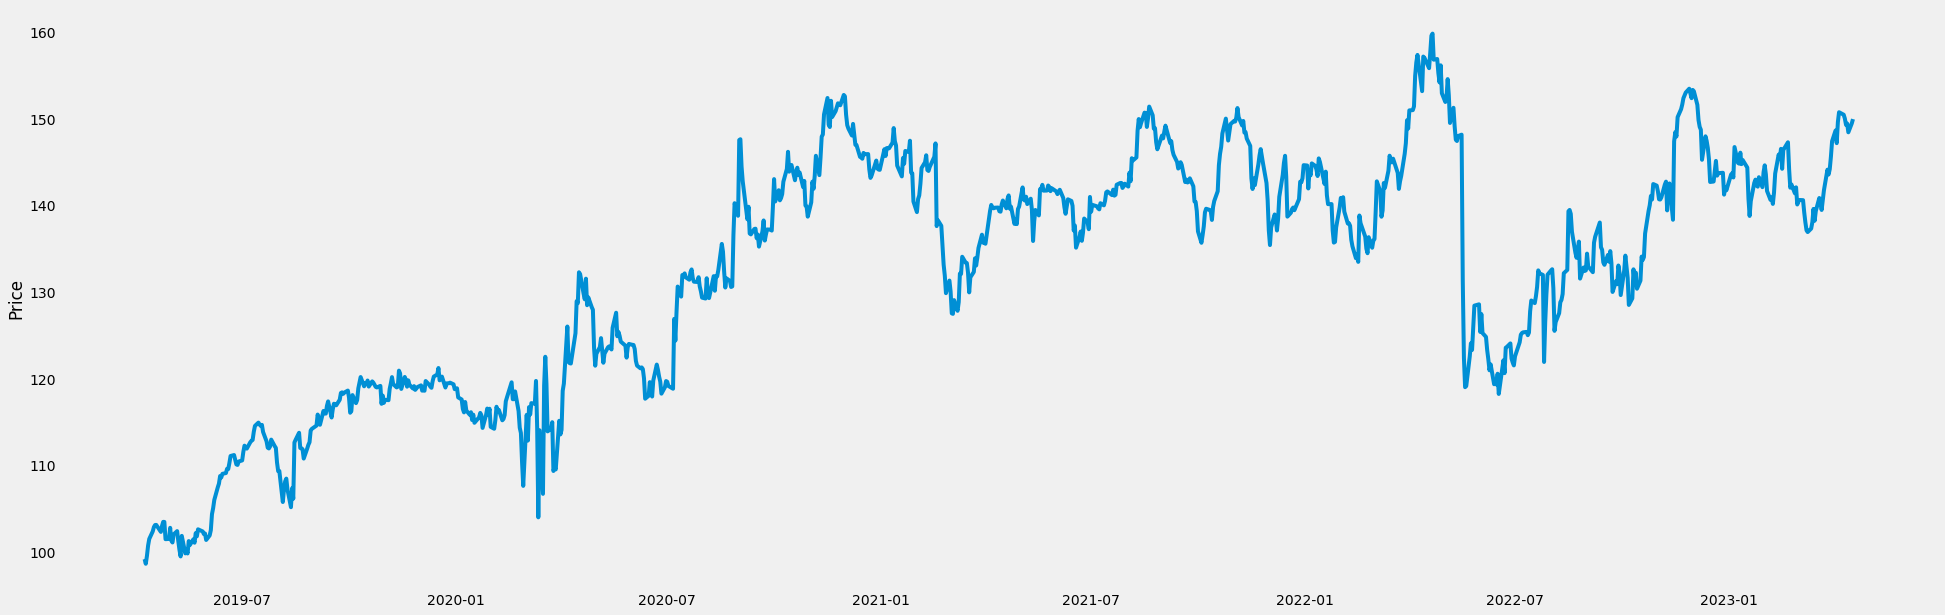

In [37]:
df['Close'].plot(figsize = (30, 10))
plt.grid()
plt.ylabel("Price")
plt.show()

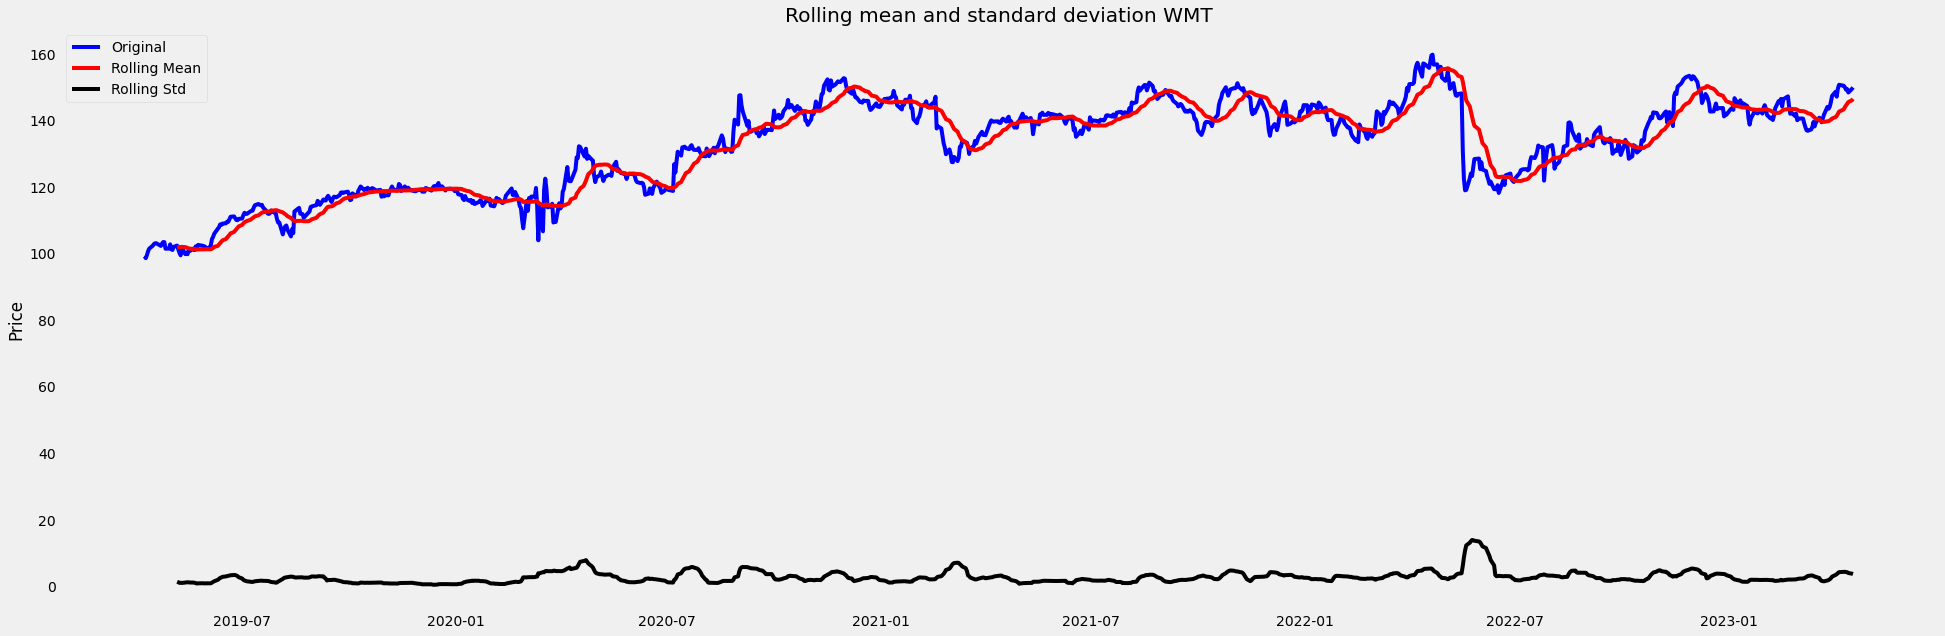

In [38]:
rolling_mean = df['Close'].rolling(20).mean()
rolling_std = df['Close'].rolling(20).std()

plt.figure(figsize = (30, 10))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'WMT')
plt.grid()
plt.ylabel("Price")
plt.show()

In [39]:
df['SMA50'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
df['SMA100'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
df

Close       SMA50      SMA100
2019-04-08   99.230003   99.230003   99.230003
2019-04-09   98.690002   98.960003   98.960003
2019-04-10   99.599998   99.173335   99.173335
2019-04-11  100.800003   99.580002   99.580002
2019-04-12  101.559998   99.976001   99.976001
...                ...         ...         ...
2023-04-12  149.339996  144.602499  143.007000
2023-04-13  149.490005  145.094999  143.119400
2023-04-14  148.479996  145.604999  143.195600
2023-04-17  149.520004  146.110999  143.313600
2023-04-18  150.006104  146.566305  143.479522

[1015 rows x 3 columns]

In [40]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA50'] > df['SMA100'], 1.0, 0.0)

In [41]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

Close      SMA50     SMA100  Signal  Position
2019-04-08   99.230003  99.230003  99.230003     0.0       NaN
2019-04-09   98.690002  98.960003  98.960003     0.0       0.0
2019-04-10   99.599998  99.173335  99.173335     0.0       0.0
2019-04-11  100.800003  99.580002  99.580002     0.0       0.0
2019-04-12  101.559998  99.976001  99.976001     0.0       0.0

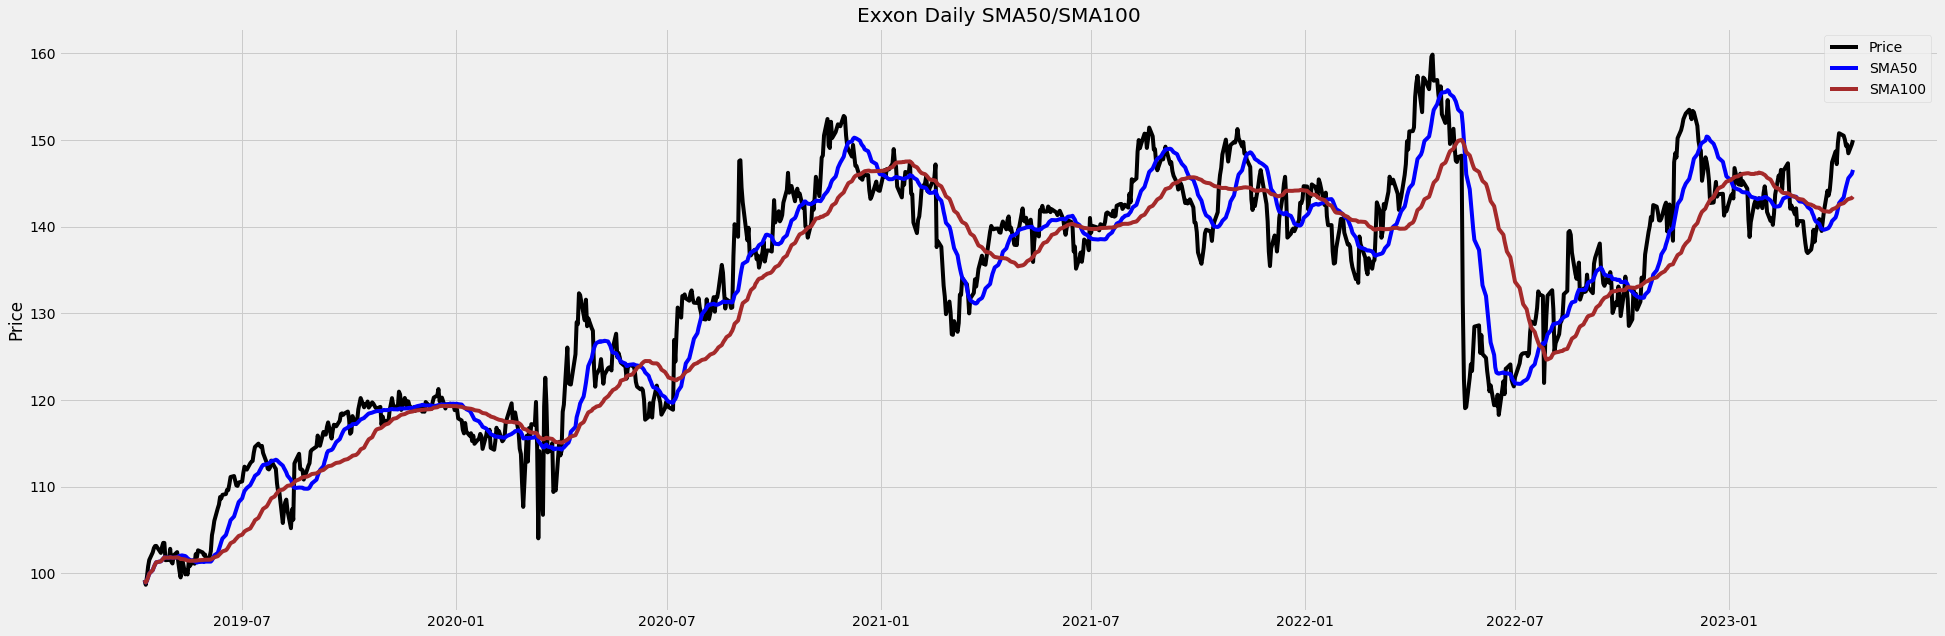

In [42]:
plt.figure(figsize=(30,10))
plt.plot(df["Close"], color="BLACK", label="Price")
plt.plot(df["SMA50"], color="BLUE", label="SMA50")
plt.plot(df["SMA100"], color="BROWN", label="SMA100")
plt.ylabel("Price")
plt.title("Exxon Daily SMA50/SMA100")
plt.legend()
plt.show()

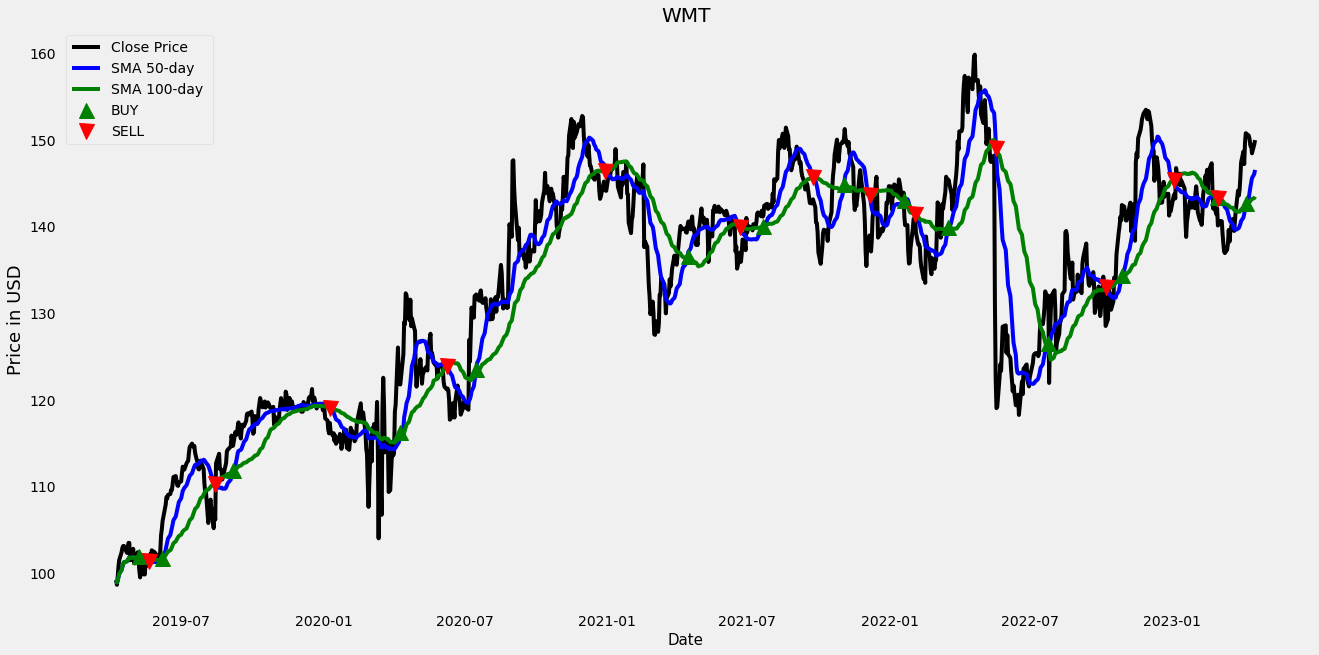

In [43]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['SMA50'].plot(color = 'b',label = 'SMA 50-day ') 
df['SMA100'].plot(color = 'g', label = 'SMA 100-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA50'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA100'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [44]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+------------+---------+---------+----------+----------+------------+
|            |   Close |   SMA50 |   SMA100 |   Signal | Position   |
|------------+---------+---------+----------+----------+------------|
| 2019-05-07 |  101.3  | 101.956 |  101.826 |        1 | Buy        |
| 2019-05-21 |  101.12 | 101.397 |  101.451 |        0 | Sell       |
| 2019-06-06 |  105.11 | 101.765 |  101.761 |        1 | Buy        |
| 2019-08-14 |  106.2  | 110.009 |  110.366 |        0 | Sell       |
| 2019-09-06 |  114.73 | 111.93  |  111.824 |        1 | Buy        |
| 2020-01-09 |  117.36 | 119.078 |  119.079 |        0 | Sell       |
| 2020-04-09 |  121.8  | 116.351 |  115.786 |        1 | Buy        |
| 2020-06-08 |  121.24 | 123.913 |  123.954 |        0 | Sell       |
| 2020-07-16 |  132.2  | 123.555 |  123.092 |        1 | Buy        |
| 2020-12-30 |  144.18 | 146.395 |  146.44  |        0 | Sell       |
| 2021-04-15 |  140.16 | 136.582 |  136.407 |        1 | Buy        |
| 2021-06-22 |  137.

# Bollinger Bands
   #####  movement of price and volatility over the time

In [45]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['SMA50'], 20)
df.tail()

Close       SMA50      SMA100  Signal  Position    upper_bb  \
2023-04-12  149.339996  144.602499  143.007000     1.0       0.0  153.280008   
2023-04-13  149.490005  145.094999  143.119400     1.0       0.0  153.704434   
2023-04-14  148.479996  145.604999  143.195600     1.0       0.0  153.708192   
2023-04-17  149.520004  146.110999  143.313600     1.0       0.0  153.837886   
2023-04-18  150.006104  146.566305  143.479522     1.0       0.0  154.070253   

              lower_bb  
2023-04-12  135.924989  
2023-04-13  136.485564  
2023-04-14  137.501806  
2023-04-17  138.384112  
2023-04-18  139.062356

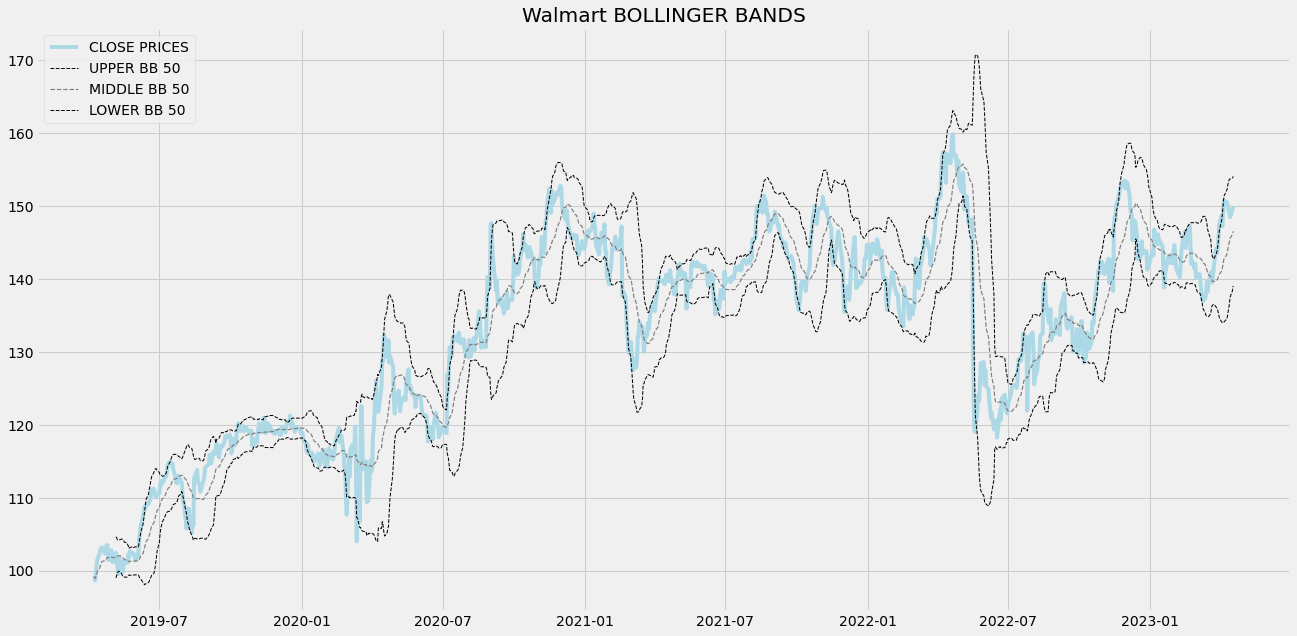

In [46]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', color = 'lightblue')
df['upper_bb'].plot(label = 'UPPER BB 50', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB 50', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB 50', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('Walmart BOLLINGER BANDS')
plt.show()

In [47]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['lower_bb'], df['upper_bb'])


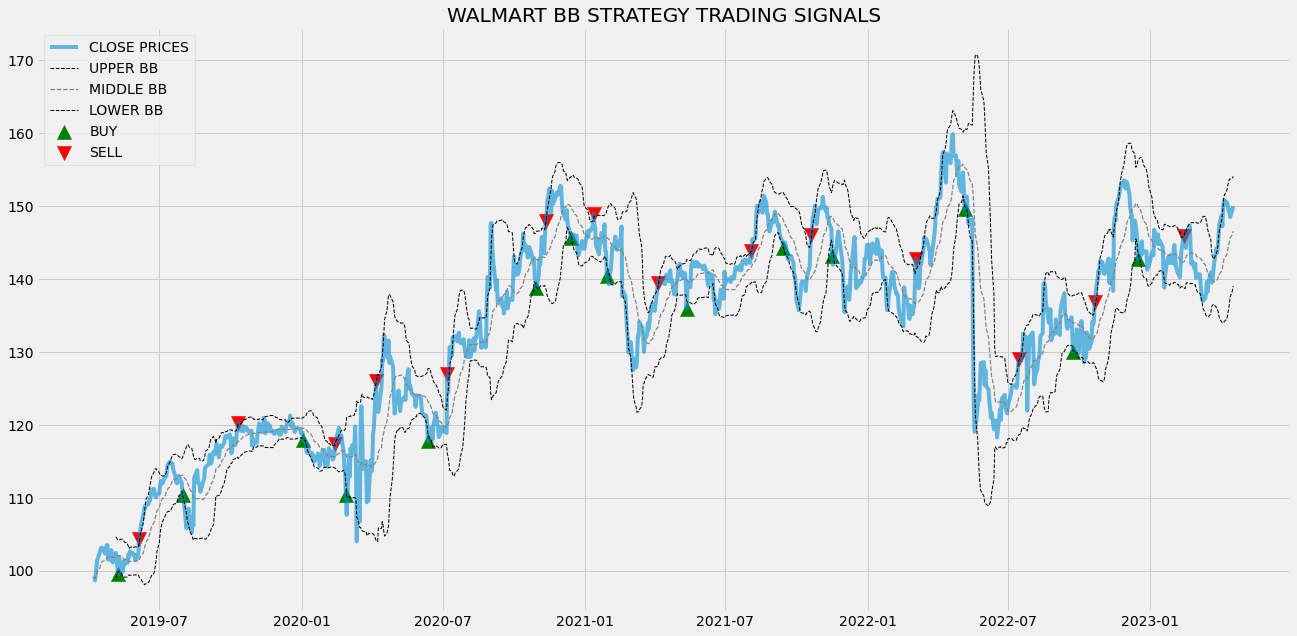

In [48]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.6)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('WALMART BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting

In [49]:
ticker ='WMT'
df=pdr.get_data_yahoo(ticker, start='2019-4-8')

[*********************100%***********************]  1 of 1 completed


In [50]:
#df.index = pd.to_datetime(df.index)

In [51]:
df.index = df.index.date
df.index.name = 'Date'
df.reset_index()
print(df.head())

                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2019-04-08   98.449997   99.250000   98.260002   99.230003  92.826904  5422400
2019-04-09   98.800003   99.230003   98.150002   98.690002  92.321732  4367500
2019-04-10   98.510002   99.720001   98.500000   99.599998  93.172997  4091100
2019-04-11   99.699997  100.830002   99.470001  100.800003  94.295586  5606900
2019-04-12  101.000000  102.019997  101.000000  101.559998  95.006516  5162000


In [52]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-08   98.449997   99.250000   98.260002   99.230003   92.826904   
2019-04-09   98.800003   99.230003   98.150002   98.690002   92.321732   
2019-04-10   98.510002   99.720001   98.500000   99.599998   93.172997   
2019-04-11   99.699997  100.830002   99.470001  100.800003   94.295586   
2019-04-12  101.000000  102.019997  101.000000  101.559998   95.006516   
...                ...         ...         ...         ...         ...   
2023-04-12  149.789993  150.970001  149.169998  149.339996  149.339996   
2023-04-13  149.649994  150.000000  148.199997  149.490005  149.490005   
2023-04-14  149.029999  149.889999  148.149994  148.479996  148.479996   
2023-04-17  148.639999  149.669998  148.500000  149.520004  149.520004   
2023-04-18  149.779999  150.339905  149.479996  149.990005  149.990005   

             Volume  
Date                 
2019-04-08  5422400  
2019-04-09  4367500  
2019-04-10  4091100  
2019-04-11  5606900  
2019-04-12  5162000  
...             ...  
2023-04-12  3736600  
2023-04-13  4424200  
2023-04-14  3488300  
2023-04-17  5388300  
2023-04-18  1894030  

[1015 rows x 6 columns]

In [53]:
print (f"start date : {str(df.index.min())}")
print (f"end date : {str(df.index.max())}")

start date : 2019-04-08
end date : 2023-04-18


In [54]:
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [55]:
df

Date        Open        High         Low       Close   Adj Close  \
0     2019-04-08   98.449997   99.250000   98.260002   99.230003   92.826904   
1     2019-04-09   98.800003   99.230003   98.150002   98.690002   92.321732   
2     2019-04-10   98.510002   99.720001   98.500000   99.599998   93.172997   
3     2019-04-11   99.699997  100.830002   99.470001  100.800003   94.295586   
4     2019-04-12  101.000000  102.019997  101.000000  101.559998   95.006516   
...          ...         ...         ...         ...         ...         ...   
1010  2023-04-12  149.789993  150.970001  149.169998  149.339996  149.339996   
1011  2023-04-13  149.649994  150.000000  148.199997  149.490005  149.490005   
1012  2023-04-14  149.029999  149.889999  148.149994  148.479996  148.479996   
1013  2023-04-17  148.639999  149.669998  148.500000  149.520004  149.520004   
1014  2023-04-18  149.779999  150.339905  149.479996  149.990005  149.990005   

       Volume          ds           y  
0     5422400  2019-04-08   99.230003  
1     4367500  2019-04-09   98.690002  
2     4091100  2019-04-10   99.599998  
3     5606900  2019-04-11  100.800003  
4     5162000  2019-04-12  101.559998  
...       ...         ...         ...  
1010  3736600  2023-04-12  149.339996  
1011  4424200  2023-04-13  149.490005  
1012  3488300  2023-04-14  148.479996  
1013  5388300  2023-04-17  149.520004  
1014  1894030  2023-04-18  149.990005  

[1015 rows x 9 columns]

In [56]:
ph_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [57]:
ph_df.head()

ds           y
0  2019-04-08   99.230003
1  2019-04-09   98.690002
2  2019-04-10   99.599998
3  2019-04-11  100.800003
4  2019-04-12  101.559998

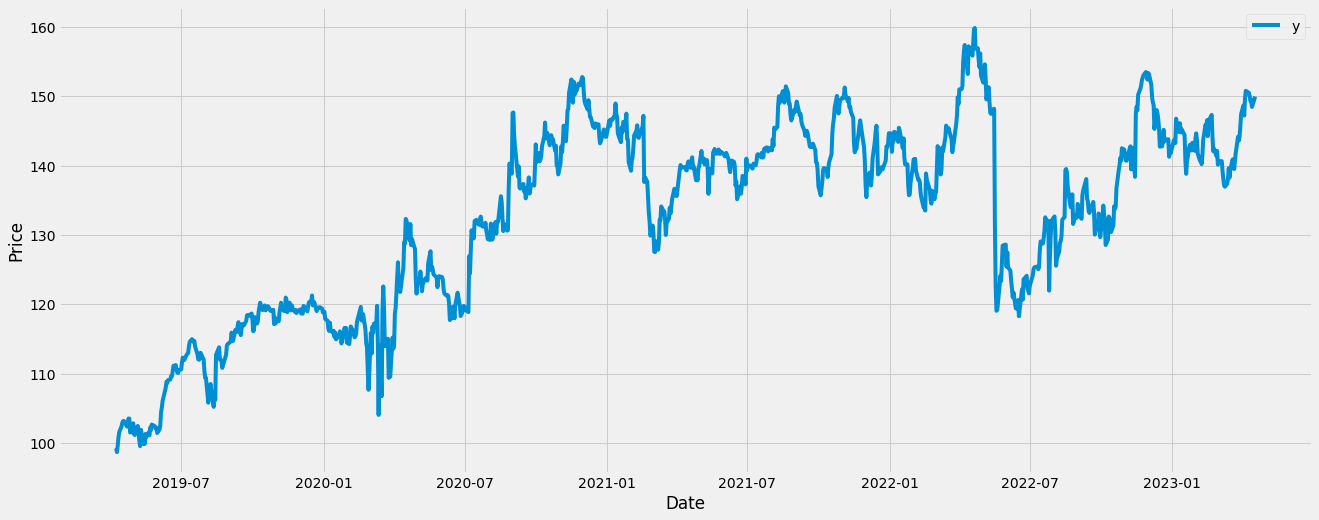

In [58]:
ax = ph_df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

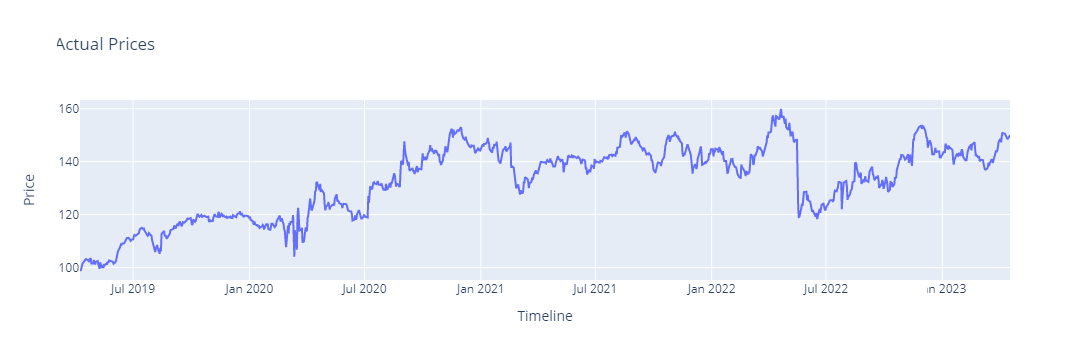

In [59]:
import plotly.express as px
fig = go.Figure([go.Scatter(x=ph_df['ds'], y=ph_df['y'])])
fig.update_layout(title_text="Actual Prices")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="Price")
fig.show()

In [60]:
model = Prophet(daily_seasonality=True)
model.fit(ph_df)

13:20:08 - cmdstanpy - INFO - Chain [1] start processing
13:20:09 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
future=model.make_future_dataframe(periods=365,freq='D')

In [62]:
predictions=model.predict(future)

In [63]:
predictions.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1375 2024-04-13  177.030199  141.825347  217.579238   139.734480   214.571509   
1376 2024-04-14  177.104396  142.341543  219.548233   139.661986   214.790670   
1377 2024-04-15  177.178594  143.761105  219.571323   139.589492   215.009831   
1378 2024-04-16  177.252791  144.597623  221.714416   139.516999   215.281014   
1379 2024-04-17  177.326989  144.137645  221.242135   139.422278   215.554676   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
1375        3.653267              3.653267              3.653267 -0.259953   
1376        4.015569              4.015569              4.015569 -0.259953   
1377        4.324050              4.324050              4.324050 -0.259953   
1378        4.753507              4.753507              4.753507 -0.259953   
1379        4.773938              4.773938              4.773938 -0.259953   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1375  ...  0.032494      0.032494      0.032494  3.880726      3.880726   
1376  ...  0.032494      0.032494      0.032494  4.243028      4.243028   
1377  ...  0.007920      0.007920      0.007920  4.576083      4.576083   
1378  ...  0.136933      0.136933      0.136933  4.876527      4.876527   
1379  ... -0.107237     -0.107237     -0.107237  5.141127      5.141127   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1375      3.880726                   0.0                         0.0   
1376      4.243028                   0.0                         0.0   
1377      4.576083                   0.0                         0.0   
1378      4.876527                   0.0                         0.0   
1379      5.141127                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1375                         0.0  180.683466  
1376                         0.0  181.119965  
1377                         0.0  181.502644  
1378                         0.0  182.006298  
1379                         0.0  182.100926  

[5 rows x 22 columns]

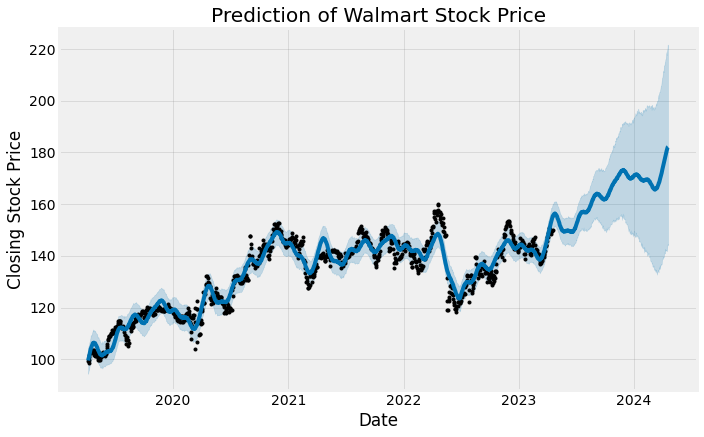

ds        yhat  yhat_lower  yhat_upper
1375 2024-04-13  180.683466  141.825347  217.579238
1376 2024-04-14  181.119965  142.341543  219.548233
1377 2024-04-15  181.502644  143.761105  219.571323
1378 2024-04-16  182.006298  144.597623  221.714416
1379 2024-04-17  182.100926  144.137645  221.242135

In [64]:
model.plot(predictions)
plt.title("Prediction of Walmart Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

The given dataset appears to contain predictions of Walmart's stock prices on different dates in April 2024. The 'ds' column contains the date of each prediction, while the 'yhat', 'yhat_lower', and 'yhat_upper' columns represent the predicted stock price, lower bound, and upper bound of the predicted stock price, respectively.

Based on the analysis of the dataset, the model predicts that Walmart's stock price will gradually increase over the course of April 2024. Specifically, the predicted stock price is $176.88 on April 1st, $177.56 on April 2nd, $177.76 on April 3rd, $178.23 on April 4th, and $178.91 on April 5th. However, it's important to keep in mind that stock prices are highly volatile and are 
influenced by numerous external factors, which means that the accuracy of these predictions is uncertain.

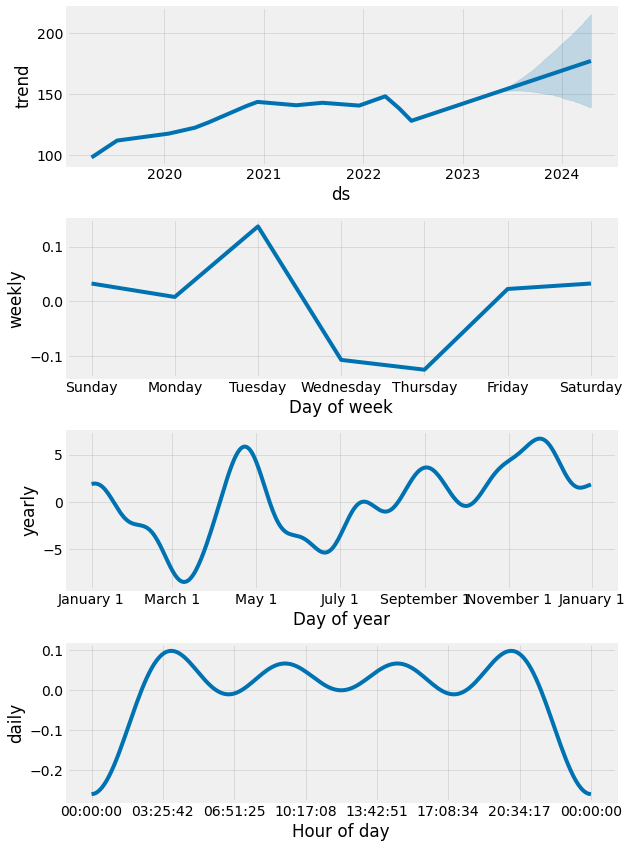

In [65]:
model.plot_components(predictions)
plt.show()

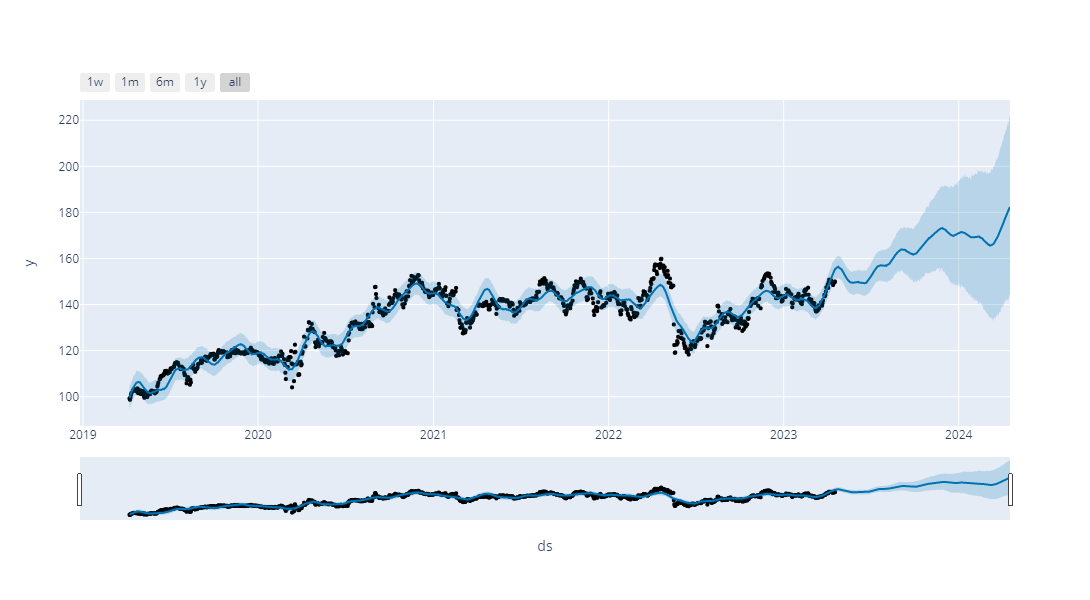

In [66]:
from prophet.plot import plot_plotly
plot_plotly(model,predictions)